In [294]:
import json
from __future__ import division

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_columns", 200)

In [381]:
with open("cpuperformance.json") as f:
    data = json.load(f, encoding='UTF-8')
    rows = data['rows']
    data_t = list()
    for r in rows:
        data_r = {'id': r['id'], 'key': r['key']}
        data_r.update(r['value'])
        data_t.append(data_r)
    df = pd.DataFrame(data_t)

In [396]:
def convert(s, dtype):
    s = s.replace('None', np.nan)
    s = s.astype(dtype)
    return s

In [383]:
df['NUM_PROCESSORS'] = df['NUM_PROCESSORS'].astype(np.int32)
df['HEPSPEC'] = convert(df['HEPSPEC'], float)

In [384]:
df[:5]

,DIMM_TYPE,FREQUENCY_CPU0,FREQUENCY_CPU1,FREQUENCY_CPU10,FREQUENCY_CPU11,FREQUENCY_CPU12,FREQUENCY_CPU13,FREQUENCY_CPU14,FREQUENCY_CPU15,FREQUENCY_CPU16,FREQUENCY_CPU17,FREQUENCY_CPU18,FREQUENCY_CPU19,FREQUENCY_CPU2,FREQUENCY_CPU20,FREQUENCY_CPU21,FREQUENCY_CPU22,FREQUENCY_CPU23,FREQUENCY_CPU3,FREQUENCY_CPU4,FREQUENCY_CPU5,FREQUENCY_CPU6,FREQUENCY_CPU7,FREQUENCY_CPU8,FREQUENCY_CPU9,HEPSPEC,LOGICAL_CORES_CPU0,LOGICAL_CORES_CPU1,LOGICAL_CORES_CPU10,LOGICAL_CORES_CPU11,LOGICAL_CORES_CPU12,LOGICAL_CORES_CPU13,LOGICAL_CORES_CPU14,LOGICAL_CORES_CPU15,LOGICAL_CORES_CPU16,LOGICAL_CORES_CPU17,LOGICAL_CORES_CPU18,LOGICAL_CORES_CPU19,LOGICAL_CORES_CPU2,LOGICAL_CORES_CPU20,LOGICAL_CORES_CPU21,LOGICAL_CORES_CPU22,LOGICAL_CORES_CPU23,LOGICAL_CORES_CPU3,LOGICAL_CORES_CPU4,LOGICAL_CORES_CPU5,LOGICAL_CORES_CPU6,LOGICAL_CORES_CPU7,LOGICAL_CORES_CPU8,LOGICAL_CORES_CPU9,MODEL_CPU0,MODEL_CPU1,MODEL_CPU10,MODEL_CPU11,MODEL_CPU12,MODEL_CPU13,MODEL_CPU14,MODEL_CPU15,MODEL_CPU16,MODEL_CPU17,MODEL_CPU18,MODEL_CPU19,MODEL_CPU2,MODEL_CPU20,MODEL_CPU21,MODEL_CPU22,MODEL_CPU23,MODEL_CPU3,MODEL_CPU4,MODEL_CPU5,MODEL_CPU6,MODEL_CPU7,MODEL_CPU8,MODEL_CPU9,MOTHERBOARD_TYPE,NUM_DIMMS,NUM_PROCESSORS,PHYSICAL_CORES_CPU0,PHYSICAL_CORES_CPU1,PHYSICAL_CORES_CPU10,PHYSICAL_CORES_CPU11,PHYSICAL_CORES_CPU12,PHYSICAL_CORES_CPU13,PHYSICAL_CORES_CPU14,PHYSICAL_CORES_CPU15,PHYSICAL_CORES_CPU16,PHYSICAL_CORES_CPU17,PHYSICAL_CORES_CPU18,PHYSICAL_CORES_CPU19,PHYSICAL_CORES_CPU2,PHYSICAL_CORES_CPU20,PHYSICAL_CORES_CPU21,PHYSICAL_CORES_CPU22,PHYSICAL_CORES_CPU23,PHYSICAL_CORES_CPU3,PHYSICAL_CORES_CPU4,PHYSICAL_CORES_CPU5,PHYSICAL_CORES_CPU6,PHYSICAL_CORES_CPU7,PHYSICAL_CORES_CPU8,PHYSICAL_CORES_CPU9,SMT_CPU0,SMT_CPU1,SMT_CPU10,SMT_CPU11,SMT_CPU12,SMT_CPU13,SMT_CPU14,SMT_CPU15,SMT_CPU16,SMT_CPU17,SMT_CPU18,SMT_CPU19,SMT_CPU2,SMT_CPU20,SMT_CPU21,SMT_CPU22,SMT_CPU23,SMT_CPU3,SMT_CPU4,SMT_CPU5,SMT_CPU6,SMT_CPU7,SMT_CPU8,SMT_CPU9,TOTAL_MEMORY,id,key
0,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdgeM610,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12288,CA1505034 1176M4J,CA1505034
1,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdgeM610,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12288,CA1505034 1G48M4J,CA1505034
2,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdgeM610,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12288,CA1505034 1NF7M4J,CA1505034
3,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdge

In [385]:
a = df[df['MODEL_CPU0'] == 'Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz']['HEPSPEC']

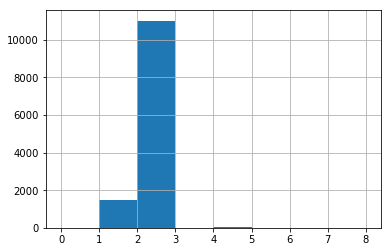

In [386]:
df['NUM_PROCESSORS'].hist(bins=8, range=[0, 8])

In [387]:
cpus = df['MODEL_CPU1'].unique()

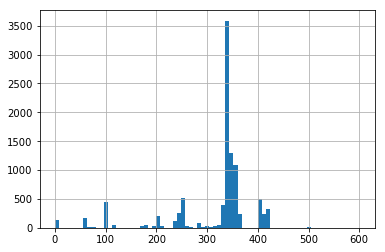

In [388]:
df['HEPSPEC'].hist(bins=75, range=[0, 600])

In [398]:
atlas_cpus = {
    'AMD Opteron(TM) Processor 6276': 0.607692173706,
    'Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz': 0.701772739664,
    'Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz': 1.10388331758,
    'Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz': 0.859444395579,
    'Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz': 1.19456241186,
    'Intel(R) Xeon(R) CPU L5520 @ 2.27GHz': 0.719852427009
}

AMD Opteron(TM) Processor 6276 nan nan nan nan
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz 8.0 8.0 342.643283582 17.9272384693
Intel(R) Xeon(R) CPU L5520 @ 2.27GHz 4.0 4.0 96.288 16.7200936587
Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz 8.0 8.0 199.561818182 17.7730095961
Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz 6.0 6.0 204.0 19.7802209049
Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz 8.0 8.0 359.358478261 20.3462671585


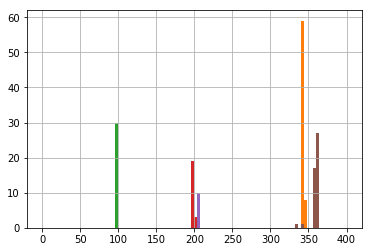

In [400]:
for c, k in atlas_cpus.items():
    hs06 = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == False)]['HEPSPEC']
    cores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == False)]['LOGICAL_CORES_CPU0']
    pcores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == False)]['PHYSICAL_CORES_CPU0']
    hs06.hist(bins=100, range=[0,400])
    print c, cores.mean(), pcores.mean(), hs06.mean(), hs06.mean() / cores.mean() / 2. / k

AMD Opteron(TM) Processor 6276 16.0 8.0 250.21438152 12.8670398613
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz 16.0 8.0 342.955086207 8.97177605587
Intel(R) Xeon(R) CPU L5520 @ 2.27GHz 8.0 4.0 97.034502924 8.42486071478
Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz 16.0 8.0 256.072925926 11.4029492497
Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz 12.0 6.0 203.804213198 9.88061852548
Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz 16.0 8.0 347.300421166 9.831780215


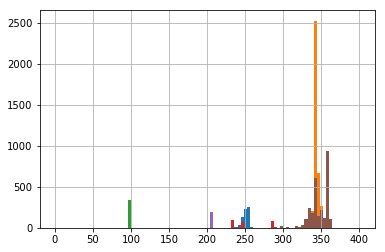

In [402]:
for c, k in atlas_cpus.items():
    hs06 = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == True)]['HEPSPEC']
    cores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == True)]['LOGICAL_CORES_CPU0']
    pcores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == True)]['PHYSICAL_CORES_CPU0']
    hs06.hist(bins=100, range=[0,400])
    print c, cores.mean(), pcores.mean(), hs06.mean(), hs06.mean() / cores.mean() / 2. / k

* AMD_Opteron(TM)_Processor_6276	0.607692
* Intel(R)_Xeon(R)_CPU_E5-2650_0_@_2.00GHz	0.701773
* Intel(R)_Xeon(R)_CPU_E5-2650_v2_@_2.60GHz	1.103883
* Intel(R)_Xeon(R)_CPU_E5-2630L_0_@_2.00GHz	0.859444
* Intel(R)_Xeon(R)_CPU_E5-2630_v3_@_2.40GHz	1.194562
* Intel(R)_Xeon(R)_CPU___________L5520__@_2.27GHz	0.719852